# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.model_selection import train_test_split

DATADIR = "ionosphere\ionosphere_data.csv"

In [2]:
df = pd.read_csv(DATADIR)
df

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [3]:
df.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [4]:
df.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

# Preprocessing Data

In [6]:
df['feature1'] = df['feature1'].astype('float64')
#df['feature2'] = df['feature2'].astype('float32')
df = df.drop(columns=['feature2'])

In [7]:
encoding={'g':1, 'b': 0}
df.label.replace(encoding, inplace=True)

In [8]:
df = df.sample(frac=1)
df

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
335,1.0,1.00000,-0.01342,1.00000,0.01566,1.00000,-0.00224,1.00000,0.06264,0.97763,...,0.10067,0.99989,0.08763,0.99105,0.08501,1.00000,0.10067,1.00000,0.10067,1
47,1.0,0.94598,-0.02685,-1.00000,0.26131,-0.36393,0.35639,0.69258,-0.63427,1.00000,...,-0.46734,0.52208,-0.58130,1.00000,-0.61393,-0.09634,0.20477,-0.06117,0.41913,0
203,1.0,1.00000,0.09091,0.95455,-0.09091,0.77273,0.00000,1.00000,0.00000,0.95455,...,0.04545,0.91541,0.02897,0.95455,0.09091,0.86364,-0.09091,0.86364,0.04545,1
71,0.0,1.00000,-1.00000,1.00000,1.00000,-1.00000,-1.00000,1.00000,-1.00000,0.00000,...,-1.00000,1.00000,-1.00000,-1.00000,-1.00000,0.00000,0.00000,1.00000,-1.00000,0
12,1.0,1.00000,-0.16316,1.00000,-0.10169,0.99999,-0.15197,1.00000,-0.19277,0.94055,...,-0.47137,0.76224,-0.58370,0.65723,-0.68794,0.68714,-0.64537,0.64727,-0.67226,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,1.0,1.00000,-0.05529,1.00000,-1.00000,0.50000,-0.11111,0.36111,-0.22222,1.00000,...,-0.27778,1.00000,-0.57092,1.00000,-0.27778,1.00000,-0.63156,1.00000,-0.65935,0
114,1.0,0.91353,0.81586,-0.72973,1.00000,-0.39466,0.55735,0.05405,0.29730,-0.18599,...,0.00002,-0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
70,1.0,1.00000,0.03529,1.00000,0.18281,1.00000,0.26968,1.00000,0.25068,1.00000,...,0.68326,0.89502,0.71374,0.85611,0.67149,0.74389,0.85611,0.71493,0.75837,1
52,1.0,1.00000,1.00000,1.00000,1.00000,0.91010,1.00000,-0.26970,1.00000,-0.83152,...,-1.00000,1.00000,-1.00000,1.00000,-1.00000,1.00000,-0.34686,1.00000,0.34845,1


In [9]:
x = df.loc[:, df.columns != 'label']
y = df.loc[:, df.columns == 'label']

In [10]:
x = (x-x.mean()) / x.std()
#x = x /255
#x.describe()

# Split into 60 and 40 ratio.

In [11]:
#Split
#Split into 80% Training(Samples,Labels) , 20% Test(Samples,Labels)
train_ratio = 0.80
test_ratio = 0.20

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1-train_ratio, random_state=42)

print('Train: {} - Test: {}'.format(len(x_train) , len(x_test)))

Train: 280 - Test: 71


# Create Model 

In [19]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

def build_model():
    Network = models.Sequential()
    Network.add(layers.Dense(164, activation='relu', kernel_regularizer=regularizers.l2(0.02), input_shape=(x_train.shape[1],) ))
    Network.add(layers.Dense(164, activation='relu', kernel_regularizer=regularizers.l2(0.02) ))
    Network.add(layers.Dense(164, activation='relu', kernel_regularizer=regularizers.l2(0.02) ))
    Network.add(layers.Dense(164, activation='relu', kernel_regularizer=regularizers.l2(0.02) ))
    Network.add(layers.Dense(164, activation='relu', kernel_regularizer=regularizers.l2(0.02) ))
    Network.add(layers.Dense(164, activation='relu', kernel_regularizer=regularizers.l2(0.02) ))
    Network.add(layers.Dense(1, activation='sigmoid'))

    # Compilation
    Network.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

    return Network

k = 4
num_val_samples = len(x_train) // k
num_epochs = 80
all_scores = []

for i in range(k):
    print('processing fold #', i)
    x_val = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    y_val = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    partial_x_train = np.concatenate([x_train[:i * num_val_samples], x_train[(i + 1) * num_val_samples:]], axis=0)
    partial_y_train = np.concatenate([y_train[:i * num_val_samples], y_train[(i + 1) * num_val_samples:]], axis=0)

    Network = build_model()
    history = Network.fit(partial_x_train, partial_y_train, epochs=num_epochs, batch_size=32, verbose=0, validation_data=(x_val, y_val))

    #val_loss, val_accuracy = Network.evaluate(x_val, y_val, verbose=0)
    print("val_loss: {} --- val_accuracy: {}".format(np.mean(history.history['val_loss']), 
                                                     np.mean(history.history['val_accuracy'])))
    
    #all_scores.append(val_accuracy)

print("Mean MAE: ", np.mean(history.history['val_accuracy'] ))

processing fold # 0
val_loss: 1.3556027131101915 --- val_accuracy: 0.835178554058075
processing fold # 1
val_loss: 1.3149506963150839 --- val_accuracy: 0.9217857122421265
processing fold # 2
val_loss: 1.311613230923457 --- val_accuracy: 0.9453571438789368
processing fold # 3
val_loss: 1.341645294316113 --- val_accuracy: 0.8646429181098938
Mean MAE:  0.8646429


# Ploting

In [49]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

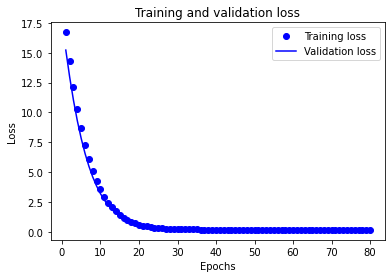

In [20]:
#Plotting the training and validation loss

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

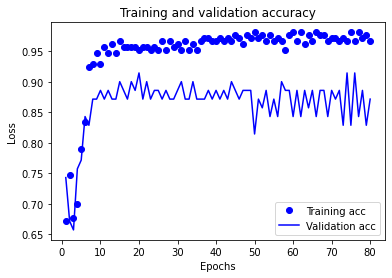

In [21]:
#Plotting the training and validation accuracy

plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate Model

In [28]:
#Check Model performance of Train Data
train_loss,train_acc=Network.evaluate(x_train, y_train)
print("Accuracy: ",train_acc*100,"\nTrain Loss Value:",train_loss)


#Check Model performance of Test Data
test_loss,test_acc=Network.evaluate(x_test, y_test)
print("Accuracy: ",test_acc*100,"\nTest Loss Value:",test_loss)

280/280 [==============================] - 0s 108us/sample - loss: 0.1640 - accuracy: 0.9429
Accuracy:  94.28571462631226 
Train Loss Value: 0.16404188871383668
71/71 [==============================] - 0s 134us/sample - loss: 0.1819 - accuracy: 0.9437
Accuracy:  94.36619877815247 
Test Loss Value: 0.18194057026379545


# Prediction

In [27]:
predictions = Network.predict(x_test)
predictions

array([[0.7892462 ],
       [0.03055628],
       [0.22614002],
       [0.90318674],
       [0.7964565 ],
       [0.89642775],
       [0.8363618 ],
       [0.49478063],
       [0.03474474],
       [0.88907945],
       [0.81942445],
       [0.89426243],
       [0.00621952],
       [0.86955523],
       [0.8114361 ],
       [0.09249265],
       [0.41120458],
       [0.8688919 ],
       [0.8894309 ],
       [0.8408262 ],
       [0.88450944],
       [0.02550198],
       [0.01745999],
       [0.68086594],
       [0.7704907 ],
       [0.8713729 ],
       [0.80086267],
       [0.43066198],
       [0.8848321 ],
       [0.18111913],
       [0.8501595 ],
       [0.7591073 ],
       [0.06066639],
       [0.88491404],
       [0.8743827 ],
       [0.04728845],
       [0.19745964],
       [0.08242002],
       [0.2627044 ],
       [0.8801846 ],
       [0.772827  ],
       [0.76178277],
       [0.87328106],
       [0.8546037 ],
       [0.8819061 ],
       [0.8973687 ],
       [0.6617011 ],
       [0.384